# ITS307 Data Analytics : Spring Semester 2022
# Assignment 2
# Supervised Learning - Linear Regression


# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Importing Libraries </li>
<li> Loading and Cleaning with Pandas</li>
<li> EDA  </li>
<li> Feature Engineering  </li>
<li> Training Model</li>
<li> Predicting</li>
<li> Evaluating Model</li>

</ol>

# Learning Objectives

Second-hand car have huge market base. Many consider to buy a Used Car intsead of buying of new one, as it's is feasible and a better investment.

The dataset shared contains some of the features that determines the second hand car's price in India. Some of the features of are:
- Name: The brand and model of the car
- Location: The location in which the car is being sold or is available for purchase.
- Year: Year or edition of the model
- Kilometers_Driven: The total kilometres driven in the car by the previous owner(s) in KM
- Fuel_Type: The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
- Transmission: The type of transmission used by the car. (Automatic / Manual)
- Owner_Type: Whether the owner is first owner or second owner and so on.
- Mileage: The standard mileage offered by the car company in kmpl or km/kg
- Engine: The displacement volume of the engine in CC.
- Power:
- Seat: Number of the seat of car
- New_Price: Price of the car when its new/first hand
- Price (Target) : Price of the used car


# 1. Loading Libraries

In [2014]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression

# 2. Loading and Cleaning with Pandas

In [2015]:
train_data = pd.read_csv('/train-data.csv')
train_data.head()

Unnamed: 0                              Name    Location  Year  \
0           0            Maruti Wagon R LXI CNG      Mumbai  2010   
1           1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2           2                      Honda Jazz V     Chennai  2011   
3           3                 Maruti Ertiga VDI     Chennai  2012   
4           4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              72000       CNG       Manual      First  26.6 km/kg   998 CC   
1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
2              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   
3              87000    Diesel       Manual      First  20.77 kmpl  1248 CC   
4              40670    Diesel    Automatic     Second   15.2 kmpl  1968 CC   

       Power  Seats  New_Price  Price  
0  58.16 bhp    5.0        NaN   1.75  
1  126.2 bhp    5.0        NaN  12.50  
2   88.7 bhp    5.0  8.61 Lakh   4.50  
3  88.76 bhp    7.0        NaN   6.00  
4  140.8 bhp    5.0        NaN  17.74

In [2016]:
train_data.tail()

Unnamed: 0                      Name   Location  Year  \
6014        6014          Maruti Swift VDI      Delhi  2014   
6015        6015  Hyundai Xcent 1.1 CRDi S     Jaipur  2015   
6016        6016     Mahindra Xylo D4 BSIV     Jaipur  2012   
6017        6017        Maruti Wagon R VXI    Kolkata  2013   
6018        6018     Chevrolet Beat Diesel  Hyderabad  2011   

      Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  \
6014              27365    Diesel       Manual      First   28.4 kmpl   
6015             100000    Diesel       Manual      First   24.4 kmpl   
6016              55000    Diesel       Manual     Second   14.0 kmpl   
6017              46000    Petrol       Manual      First   18.9 kmpl   
6018              47000    Diesel       Manual      First  25.44 kmpl   

       Engine     Power  Seats  New_Price  Price  
6014  1248 CC    74 bhp    5.0  7.88 Lakh   4.75  
6015  1120 CC    71 bhp    5.0        NaN   4.00  
6016  2498 CC   112 bhp    8.0        NaN   2.90  
6017   998 CC  67.1 bhp    5.0        NaN   2.65  
6018   936 CC  57.6 bhp    5.0        NaN   2.50

In [2017]:
train_data.shape

(6019, 14)

In [2018]:
train_data.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [2019]:
#drop new_price column
train_data.drop(['New_Price'],axis=1,inplace=True)


In [2020]:
#drop Unnamed column
train_data.drop(['Unnamed: 0'],axis=1,inplace=True)


In [2021]:
train_data.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [2022]:
train_data.isnull()

Name  Location   Year  Kilometers_Driven  Fuel_Type  Transmission  \
0     False     False  False              False      False         False   
1     False     False  False              False      False         False   
2     False     False  False              False      False         False   
3     False     False  False              False      False         False   
4     False     False  False              False      False         False   
...     ...       ...    ...                ...        ...           ...   
6014  False     False  False              False      False         False   
6015  False     False  False              False      False         False   
6016  False     False  False              False      False         False   
6017  False     False  False              False      False         False   
6018  False     False  False              False      False         False   

      Owner_Type  Mileage  Engine  Power  Seats  Price  
0          False    False   False  False  False  False  
1          False    False   False  False  False  False  
2          False    False   False  False  False  False  
3          False    False   False  False  False  False  
4          False    False   False  False  False  False  
...          ...      ...     ...    ...    ...    ...  
6014       False    False   False  False  False  False  
6015       False    False   False  False  False  False  
6016       False    False   False  False  False  False  
6017       False    False   False  False  False  False  
6018       False    False   False  False  False  False  

[6019 rows x 12 columns]

In [2023]:
#dropping the null values
new_train_data = train_data.dropna()
new_train_data.isnull().sum()


Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [2024]:
new_train_data.shape

(5975, 12)

In [2025]:
new_train_data.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type     Mileage   Engine      Power  Seats  \
0       CNG       Manual      First  26.6 km/kg   998 CC  58.16 bhp    5.0   
1    Diesel       Manual      First  19.67 kmpl  1582 CC  126.2 bhp    5.0   
2    Petrol       Manual      First   18.2 kmpl  1199 CC   88.7 bhp    5.0   
3    Diesel       Manual      First  20.77 kmpl  1248 CC  88.76 bhp    7.0   
4    Diesel    Automatic     Second   15.2 kmpl  1968 CC  140.8 bhp    5.0   

   Price  
0   1.75  
1  12.50  
2   4.50  
3   6.00  
4  17.74

In [2026]:
new_train_data['Name'].nunique()

1855

In [2027]:
new_train_data['Brand_Name'] = new_train_data['Name'].str.split(' ').str[0]
new_train_data.groupby('Brand_Name').nunique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Name  Location  Year  Kilometers_Driven  Fuel_Type  \
Brand_Name                                                          
Ambassador        1         1     1                  1          1   
Audi             69        11    12                180          2   
BMW              86        11    14                188          2   
Bentley           1         1     1                  1          1   
Chevrolet        43        11    15                107          2   
Datsun            9         7     3                 12          1   
Fiat             17         9    10                 23          2   
Force             2         2     1                  2          1   
Ford            112        11    17                236          2   
Honda           152        11    19                412          2   
Hyundai         269        11    19                711          4   
ISUZU             1         2     2                  2          1   
Isuzu             1         1     1                  1          1   
Jaguar           14         9     8                 39          2   
Jeep              7         7     3                 15          2   
Lamborghini       1         1     1                  1          1   
Land             29        10    10                 52          1   
Mahindra        112        11    17                218          2   
Maruti          289        11    21                765          4   
Mercedes-Benz   110        11    19                231          2   
Mini             11        11     8                 24          2   
Mitsubishi       16        10    13                 26          2   
Nissan           43        11    10                 80          2   
Porsche          13         7     8                 18          2   
Renault          41        11     9                118          2   
Skoda            90        11    17                141          2   
Smart             1         1     1                  1          1   
Tata            109        11    17                150          3   
Toyota          116        11    19                305          3   
Volkswagen       74        11    12                224          2   
Volvo            16         9     8                 20          1   

               Transmission  Owner_Type  Mileage  Engine  Power  Seats  Price  
Brand_Name                                                                     
Ambassador                1           1        1       1      1      1      1  
Audi                      1           3       38      11     29      5    166  
BMW                       1           3       46       8     25      4    180  
Bentley                   1           1        1       1      1      1      1  
Chevrolet                 2           3       25      11     26      6     80  
Datsun                    1           1        5       2      4      2     12  
Fiat                      1           3       12       4     13      1     21  
Force                     1           1        1       2      2      1      2  
Ford                      2           4       39      16     33      3    177  
Honda                     2           3       50      10     28      2    271  
Hyundai                   2           4       77      21     49      2    438  
ISUZU                     1           1        1       1      1      1      2  
Isuzu                     1           1        1       1      1      1      1  
Jaguar                    1           2       10       4     10      3     35  
Jeep                      2           1        3       2      2      1     14  
Lamborghini               1           1        1       1      1      1      1  
Land                      1           2       17       5     13      3     53  
Mahindra                  2           3       29      13     22      5    184  
Maruti                    2           4       83      17     55      4    396  
Mercedes-Benz             2           3       43      15 

In [2028]:
new_train_data = new_train_data.drop('Name', axis=1)

In [2029]:
new_train_data.head()

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0      Mumbai  2010              72000       CNG       Manual      First   
1        Pune  2015              41000    Diesel       Manual      First   
2     Chennai  2011              46000    Petrol       Manual      First   
3     Chennai  2012              87000    Diesel       Manual      First   
4  Coimbatore  2013              40670    Diesel    Automatic     Second   

      Mileage   Engine      Power  Seats  Price Brand_Name  
0  26.6 km/kg   998 CC  58.16 bhp    5.0   1.75     Maruti  
1  19.67 kmpl  1582 CC  126.2 bhp    5.0  12.50    Hyundai  
2   18.2 kmpl  1199 CC   88.7 bhp    5.0   4.50      Honda  
3  20.77 kmpl  1248 CC  88.76 bhp    7.0   6.00     Maruti  
4   15.2 kmpl  1968 CC  140.8 bhp    5.0  17.74       Audi

In [2030]:
new_train_data.dtypes

Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
Brand_Name            object
dtype: object

In [2031]:
#Split the mileage and change the dtype
mileage = [float(r.split(' ')[0]) for r in new_train_data.Mileage]
new_train_data['Mileage'] = mileage
new_train_data.head()

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0      Mumbai  2010              72000       CNG       Manual      First   
1        Pune  2015              41000    Diesel       Manual      First   
2     Chennai  2011              46000    Petrol       Manual      First   
3     Chennai  2012              87000    Diesel       Manual      First   
4  Coimbatore  2013              40670    Diesel    Automatic     Second   

   Mileage   Engine      Power  Seats  Price Brand_Name  
0    26.60   998 CC  58.16 bhp    5.0   1.75     Maruti  
1    19.67  1582 CC  126.2 bhp    5.0  12.50    Hyundai  
2    18.20  1199 CC   88.7 bhp    5.0   4.50      Honda  
3    20.77  1248 CC  88.76 bhp    7.0   6.00     Maruti  
4    15.20  1968 CC  140.8 bhp    5.0  17.74       Audi

In [2032]:
engine = [int(r.split(' ')[0]) for r in new_train_data.Engine]
new_train_data['Engine'] = engine

In [2033]:
new_train_data['Power'] = new_train_data.Power.str.rstrip('bhp')
new_train_data = new_train_data[new_train_data['Power'].str.strip()!='null']
new_train_data['Power'] = new_train_data.Power.astype('float')

In [2034]:
new_train_data.head()

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0      Mumbai  2010              72000       CNG       Manual      First   
1        Pune  2015              41000    Diesel       Manual      First   
2     Chennai  2011              46000    Petrol       Manual      First   
3     Chennai  2012              87000    Diesel       Manual      First   
4  Coimbatore  2013              40670    Diesel    Automatic     Second   

   Mileage  Engine   Power  Seats  Price Brand_Name  
0    26.60     998   58.16    5.0   1.75     Maruti  
1    19.67    1582  126.20    5.0  12.50    Hyundai  
2    18.20    1199   88.70    5.0   4.50      Honda  
3    20.77    1248   88.76    7.0   6.00     Maruti  
4    15.20    1968  140.80    5.0  17.74       Audi

In [2035]:
new_train_data.dtypes

Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine                 int64
Power                float64
Seats                float64
Price                float64
Brand_Name            object
dtype: object

In [2036]:
test_data = pd.read_csv('/test-data.csv')
test_data.head()

Unnamed: 0                                       Name    Location  Year  \
0           0                    Maruti Alto K10 LXI CNG       Delhi  2014   
1           1              Maruti Alto 800 2016-2019 LXI  Coimbatore  2013   
2           2  Toyota Innova Crysta Touring Sport 2.4 MT      Mumbai  2017   
3           3                       Toyota Etios Liva GD   Hyderabad  2012   
4           4                          Hyundai i20 Magna      Mumbai  2014   

   Kilometers_Driven Fuel_Type Transmission Owner_Type      Mileage   Engine  \
0              40929       CNG       Manual      First  32.26 km/kg   998 CC   
1              54493    Petrol       Manual     Second    24.7 kmpl   796 CC   
2              34000    Diesel       Manual      First   13.68 kmpl  2393 CC   
3             139000    Diesel       Manual      First   23.59 kmpl  1364 CC   
4              29000    Petrol       Manual      First    18.5 kmpl  1197 CC   

       Power  Seats   New_Price  
0   58.2 bhp    4.0         NaN  
1   47.3 bhp    5.0         NaN  
2  147.8 bhp    7.0  25.27 Lakh  
3   null bhp    5.0         NaN  
4  82.85 bhp    5.0         NaN

In [2037]:
test_data.tail()

Unnamed: 0                                               Name  \
1229        1229                  Volkswagen Vento Diesel Trendline   
1230        1230                             Volkswagen Polo GT TSI   
1231        1231                             Nissan Micra Diesel XV   
1232        1232                             Volkswagen Polo GT TSI   
1233        1233  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...   

       Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
1229  Hyderabad  2011              89411    Diesel       Manual      First   
1230     Mumbai  2015              59000    Petrol    Automatic      First   
1231    Kolkata  2012              28000    Diesel       Manual      First   
1232       Pune  2013              52262    Petrol    Automatic      Third   
1233      Kochi  2014              72443    Diesel    Automatic      First   

         Mileage   Engine      Power  Seats New_Price  
1229  20.54 kmpl  1598 CC  103.6 bhp    5.0       NaN  
1230  17.21 kmpl  1197 CC  103.6 bhp    5.0       NaN  
1231  23.08 kmpl  1461 CC   63.1 bhp    5.0       NaN  
1232   17.2 kmpl  1197 CC  103.6 bhp    5.0       NaN  
1233   10.0 kmpl  2148 CC    170 bhp    5.0       NaN

In [2038]:
test_data.shape

(1234, 13)

In [2039]:
test_data.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
dtype: int64

In [2040]:
test_data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [2041]:
test_data.drop(['New_Price'],axis=1,inplace=True)

In [2042]:
test_data.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               10
Power                10
Seats                11
dtype: int64

In [2043]:
new_test_data = test_data.dropna()
new_test_data.head()

Name    Location  Year  \
0                    Maruti Alto K10 LXI CNG       Delhi  2014   
1              Maruti Alto 800 2016-2019 LXI  Coimbatore  2013   
2  Toyota Innova Crysta Touring Sport 2.4 MT      Mumbai  2017   
3                       Toyota Etios Liva GD   Hyderabad  2012   
4                          Hyundai i20 Magna      Mumbai  2014   

   Kilometers_Driven Fuel_Type Transmission Owner_Type      Mileage   Engine  \
0              40929       CNG       Manual      First  32.26 km/kg   998 CC   
1              54493    Petrol       Manual     Second    24.7 kmpl   796 CC   
2              34000    Diesel       Manual      First   13.68 kmpl  2393 CC   
3             139000    Diesel       Manual      First   23.59 kmpl  1364 CC   
4              29000    Petrol       Manual      First    18.5 kmpl  1197 CC   

       Power  Seats  
0   58.2 bhp    4.0  
1   47.3 bhp    5.0  
2  147.8 bhp    7.0  
3   null bhp    5.0  
4  82.85 bhp    5.0

In [2044]:
new_test_data.shape

(1223, 11)

In [2045]:
new_test_data['Name'].nunique()

759

In [2046]:
new_test_data['Brand_Name'] = new_test_data['Name'].str.split(' ').str[0]
new_test_data.groupby('Brand_Name').nunique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Name  Location  Year  Kilometers_Driven  Fuel_Type  \
Brand_Name                                                          
Audi             30        11    10                 46          2   
BMW              27        10    10                 38          2   
Bentley           1         1     1                  1          1   
Chevrolet        20        10    12                 29          2   
Datsun            3         3     3                  4          1   
Fiat              9         4     7                  9          2   
Ford             38        11    14                 47          2   
Hindustan         1         1     1                  1          1   
Honda            72        11    14                115          2   
Hyundai         136        11    16                182          4   
ISUZU             1         1     1                  1          1   
Isuzu             1         1     1                  1          1   
Jaguar            6         5     6                  8          2   
Jeep              4         4     3                  4          2   
Land              7         3     4                  7          1   
Mahindra         41        11    12                 55          2   
Maruti          124        11    18                200          4   
Mercedes-Benz    46         9    14                 53          2   
Mini              4         4     4                  5          2   
Mitsubishi        3         7     7                  9          1   
Nissan           17         9    10                 24          2   
OpelCorsa         1         1     1                  1          1   
Porsche           1         1     1                  1          1   
Renault          14        11     7                 24          2   
Skoda            20         9    12                 27          2   
Tata             36        11    11                 40          2   
Toyota           54        11    16                 88          2   
Volkswagen       36        11    10                 55          2   
Volvo             6         6     5                  6          1   

               Transmission  Owner_Type  Mileage  Engine  Power  Seats  
Brand_Name                                                              
Audi                      2           3       19       3     14      2  
BMW                       1           3       23       7     12      2  
Bentley                   1           1        1       1      1      1  
Chevrolet                 2           3       17      10     19      4  
Datsun                    1           1        2       2      2      2  
Fiat                      2           2        7       3      7      2  
Ford                      2           2       20      11     19      2  
Hindustan                 1           1        1       1      1      1  
Honda                     2           3       34       7     20      2  
Hyundai                   2           4       52      20     44      1  
ISUZU                     1           1        1       1      1      1  
Isuzu                     1           1        1       1      1      1  
Jaguar                    1           1        5       4      4      1  
Jeep                      1           1        3       2      2      1  
Land                      1           2        6       2      6      2  
Mahindra                  2           2       22       8     15      4  
Maruti                    2           4       58      12     37      4  
Mercedes-Benz             2           3       32      11     27      3  
Mini                      2           1        4       3      4      2  
Mitsubishi                2           1        2       2      2      2  
Nissan                    2           3       15       7     14      2  
OpelCorsa                 1           1        1       1      1      1  
Porsche                   1           1        1       1      1      1  
Renault                   2           2       11  

In [2047]:
new_test_data = new_test_data.drop('Name', axis=1)
new_test_data.head()

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0       Delhi  2014              40929       CNG       Manual      First   
1  Coimbatore  2013              54493    Petrol       Manual     Second   
2      Mumbai  2017              34000    Diesel       Manual      First   
3   Hyderabad  2012             139000    Diesel       Manual      First   
4      Mumbai  2014              29000    Petrol       Manual      First   

       Mileage   Engine      Power  Seats Brand_Name  
0  32.26 km/kg   998 CC   58.2 bhp    4.0     Maruti  
1    24.7 kmpl   796 CC   47.3 bhp    5.0     Maruti  
2   13.68 kmpl  2393 CC  147.8 bhp    7.0     Toyota  
3   23.59 kmpl  1364 CC   null bhp    5.0     Toyota  
4    18.5 kmpl  1197 CC  82.85 bhp    5.0    Hyundai

In [2048]:
new_test_data.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Brand_Name           0
dtype: int64

In [2049]:
new_test_data.head()

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0       Delhi  2014              40929       CNG       Manual      First   
1  Coimbatore  2013              54493    Petrol       Manual     Second   
2      Mumbai  2017              34000    Diesel       Manual      First   
3   Hyderabad  2012             139000    Diesel       Manual      First   
4      Mumbai  2014              29000    Petrol       Manual      First   

       Mileage   Engine      Power  Seats Brand_Name  
0  32.26 km/kg   998 CC   58.2 bhp    4.0     Maruti  
1    24.7 kmpl   796 CC   47.3 bhp    5.0     Maruti  
2   13.68 kmpl  2393 CC  147.8 bhp    7.0     Toyota  
3   23.59 kmpl  1364 CC   null bhp    5.0     Toyota  
4    18.5 kmpl  1197 CC  82.85 bhp    5.0    Hyundai

In [2050]:
new_test_data.dtypes

Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Brand_Name            object
dtype: object

In [2051]:
mileage = [float(r.split(' ')[0]) for r in new_test_data.Mileage]
new_test_data['Mileage'] = mileage
new_test_data.head()

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0       Delhi  2014              40929       CNG       Manual      First   
1  Coimbatore  2013              54493    Petrol       Manual     Second   
2      Mumbai  2017              34000    Diesel       Manual      First   
3   Hyderabad  2012             139000    Diesel       Manual      First   
4      Mumbai  2014              29000    Petrol       Manual      First   

   Mileage   Engine      Power  Seats Brand_Name  
0    32.26   998 CC   58.2 bhp    4.0     Maruti  
1    24.70   796 CC   47.3 bhp    5.0     Maruti  
2    13.68  2393 CC  147.8 bhp    7.0     Toyota  
3    23.59  1364 CC   null bhp    5.0     Toyota  
4    18.50  1197 CC  82.85 bhp    5.0    Hyundai

In [2052]:
engine = [int(r.split(' ')[0]) for r in new_test_data.Engine]
new_test_data['Engine'] = engine


In [2053]:
new_test_data['Power'] = new_test_data.Power.str.rstrip('bhp')
new_test_data = new_test_data[new_test_data['Power'].str.strip()!='null']
new_test_data['Power'] = new_test_data.Power.astype('float')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [2054]:
new_test_data.head()

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0       Delhi  2014              40929       CNG       Manual      First   
1  Coimbatore  2013              54493    Petrol       Manual     Second   
2      Mumbai  2017              34000    Diesel       Manual      First   
4      Mumbai  2014              29000    Petrol       Manual      First   
5  Coimbatore  2016              85609    Diesel       Manual     Second   

   Mileage  Engine   Power  Seats Brand_Name  
0    32.26     998   58.20    4.0     Maruti  
1    24.70     796   47.30    5.0     Maruti  
2    13.68    2393  147.80    7.0     Toyota  
4    18.50    1197   82.85    5.0    Hyundai  
5    16.00    2179  140.00    7.0   Mahindra

In [2055]:
new_test_data.dtypes

Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine                 int64
Power                float64
Seats                float64
Brand_Name            object
dtype: object

# 3.  EDA and Visualization

#Data Correlation and Distribution

In [2056]:
train_v = new_train_data[['Kilometers_Driven', 'Mileage', 'Power','Engine', 'Price']]

In [2057]:
correlation = train_v.corr()
correlation

/usr/local/lib/python3.7/dist-packages/IPython/core/displayhook.py:260: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


Kilometers_Driven   Mileage     Power    Engine     Price
Kilometers_Driven           1.000000 -0.060608  0.033490  0.093030 -0.008249
Mileage                    -0.060608  1.000000 -0.538844 -0.637258 -0.341652
Power                       0.033490 -0.538844  1.000000  0.866301  0.772843
Engine                      0.093030 -0.637258  0.866301  1.000000  0.658047
Price                      -0.008249 -0.341652  0.772843  0.658047  1.000000

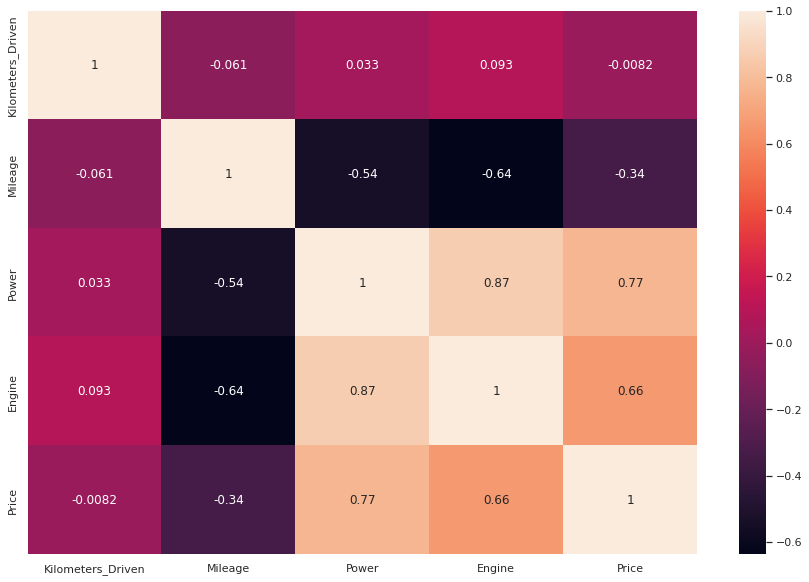

In [2058]:
#Visualize correlation using HeatMap
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data = correlation, annot=True)
plt.show()

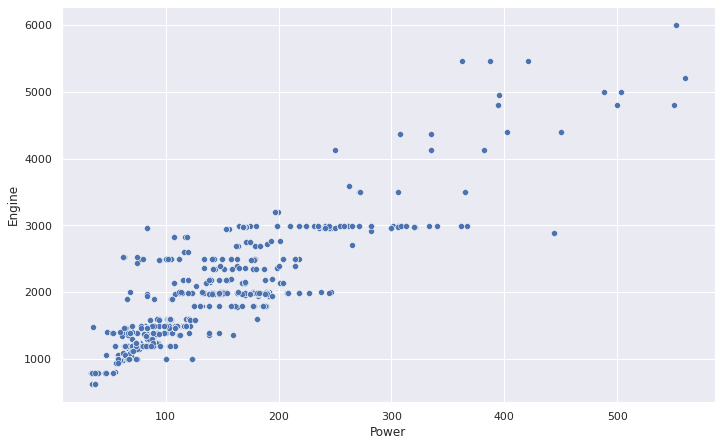

In [2059]:
sns.set(rc={'figure.figsize': (11.7,7.27)})
sns.scatterplot(data = train_v, x = 'Power', y = 'Engine')
plt.xlabel('Power')
plt.ylabel('Engine')
plt.show()

#Data Distribution before transformation for train data

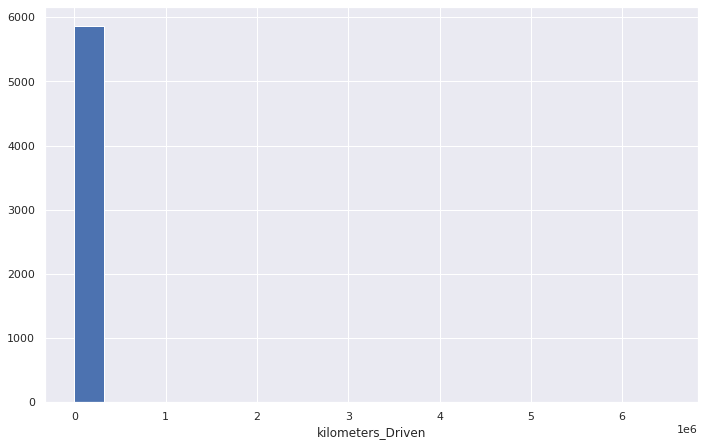

In [2060]:
plt.hist(new_train_data.Kilometers_Driven, bins=20)
plt.xlabel("kilometers_Driven")
plt.show()

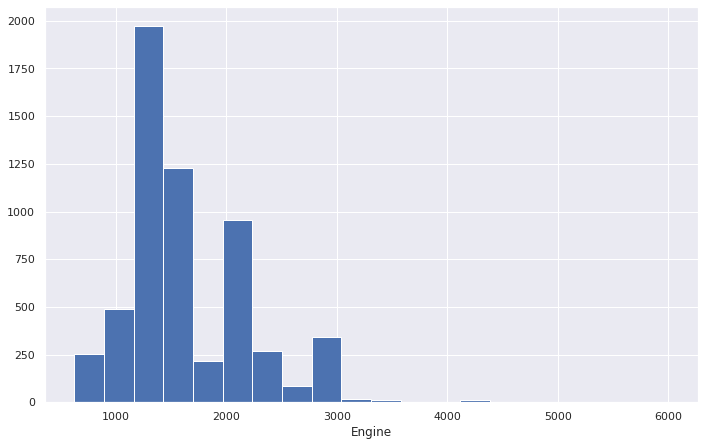

In [2061]:
plt.hist(new_train_data.Engine, bins=20)
plt.xlabel("Engine")
plt.show()

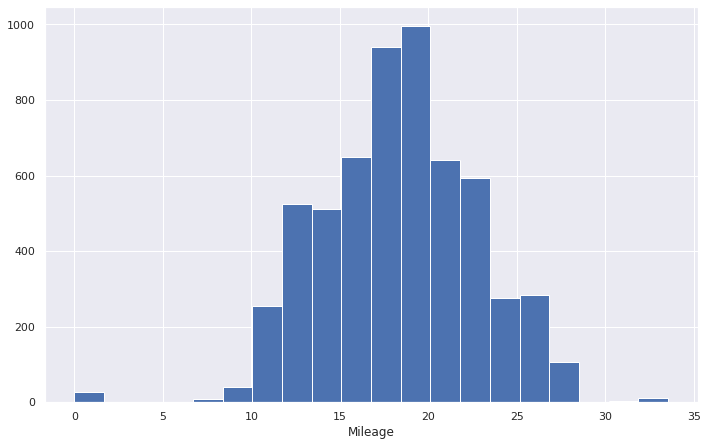

In [2062]:
plt.hist(new_train_data.Mileage, bins=20)
plt.xlabel("Mileage")
plt.show()

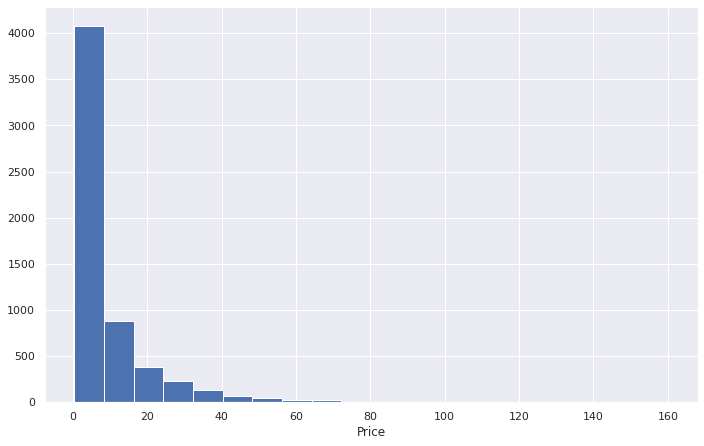

In [2063]:
plt.hist(new_train_data.Price, bins=20)
plt.xlabel("Price")
plt.show()

##Data Distribution before transformation for test data:

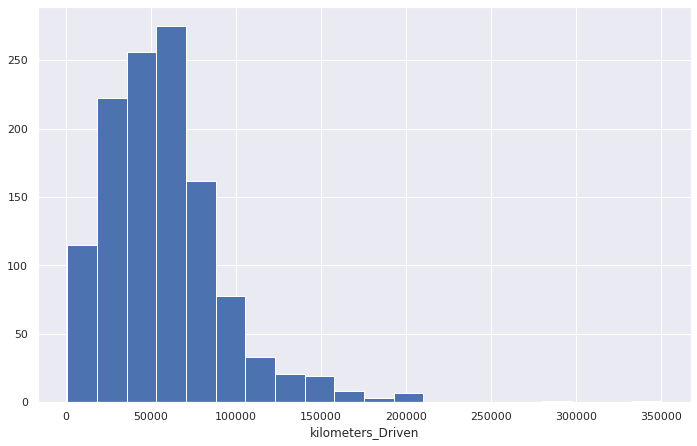

In [2064]:
plt.hist(new_test_data.Kilometers_Driven, bins=20)
plt.xlabel("kilometers_Driven")
plt.show()

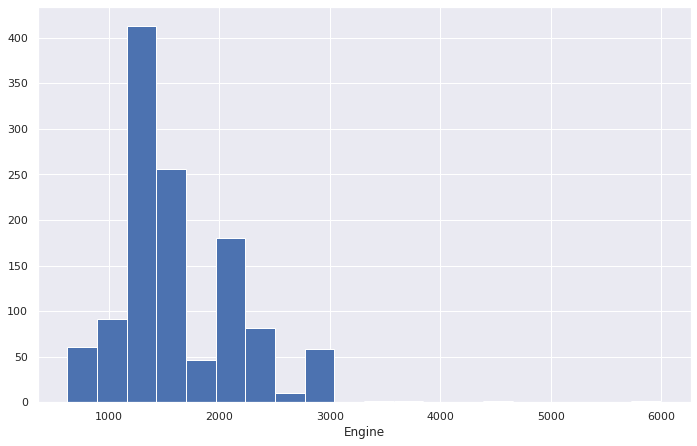

In [2065]:
plt.hist(new_test_data.Engine, bins=20)
plt.xlabel("Engine")
plt.show()

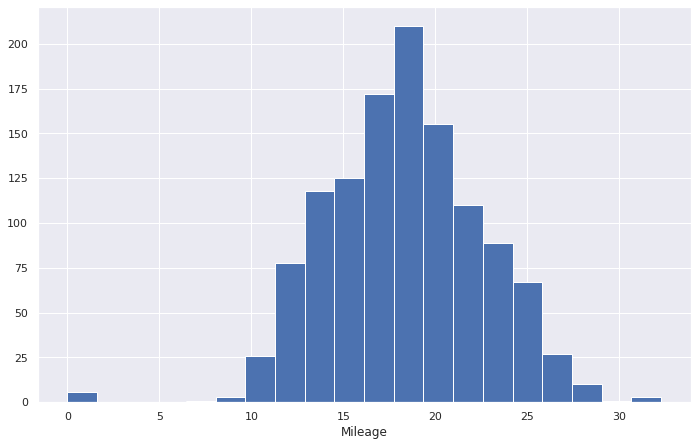

In [2066]:
plt.hist(new_test_data.Mileage, bins=20)
plt.xlabel("Mileage")
plt.show()

# 4. Feature Engineering 

#Distribution after Log Transformation for train data

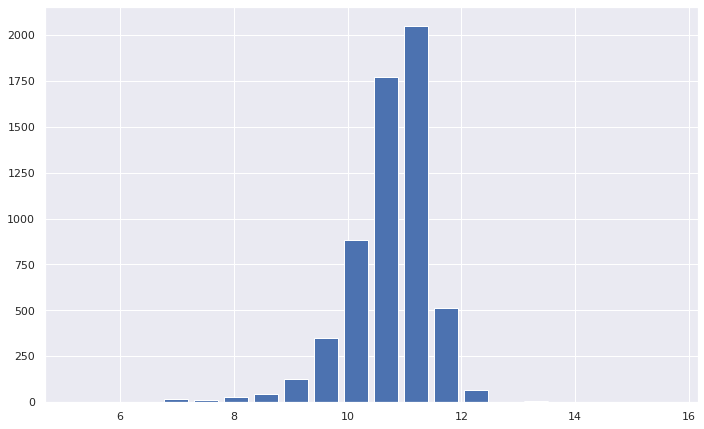

In [2067]:
#Distribution after applying log transformation
x = np.log(new_train_data['Kilometers_Driven'])
plt.hist(x, bins=20, rwidth=0.8)
plt.show()

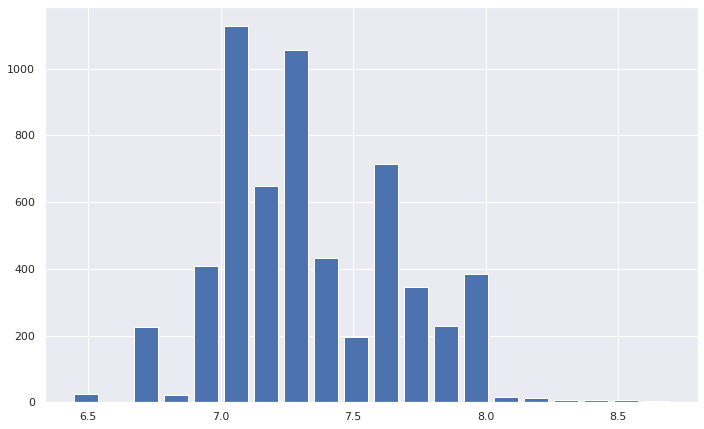

In [2068]:
x = np.log(new_train_data['Engine'])
plt.hist(x, bins=20, rwidth=0.8)
plt.show()

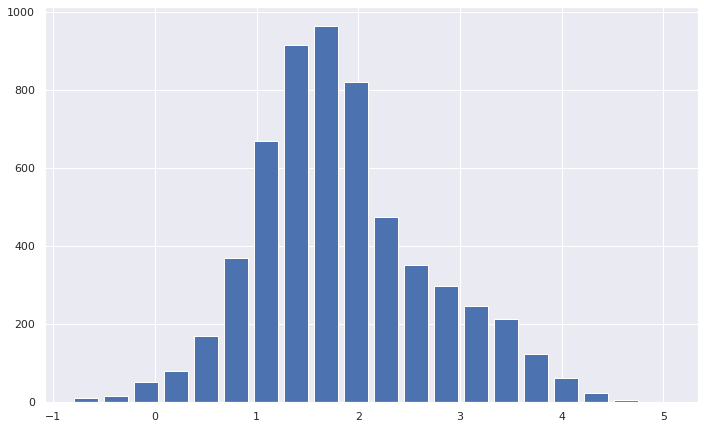

In [2069]:
x = np.log(new_train_data['Price'])
plt.hist(x,bins=20,rwidth=0.8)
plt.show()

#Test data distribution after Log Transformation

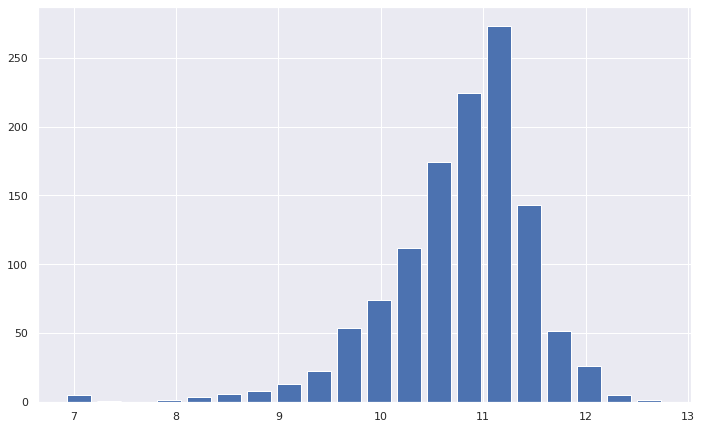

In [2070]:
x = np.log(new_test_data['Kilometers_Driven'])
plt.hist(x, bins=20, rwidth=0.8)
plt.show()

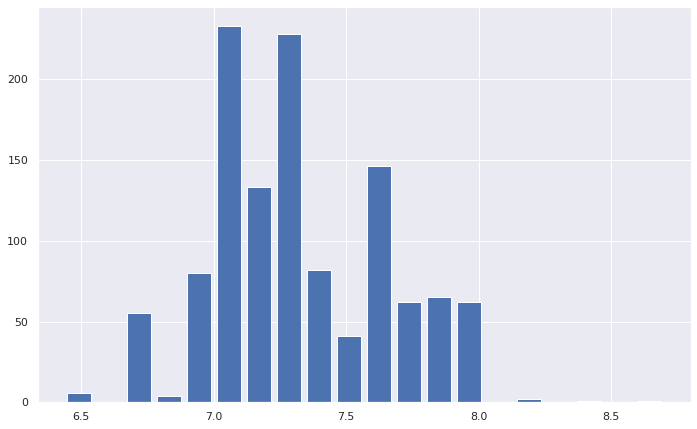

In [2071]:
x = np.log(new_test_data['Engine'])
plt.hist(x, bins=20, rwidth=0.8)
plt.show()

#Train data distribution after cube root transformation

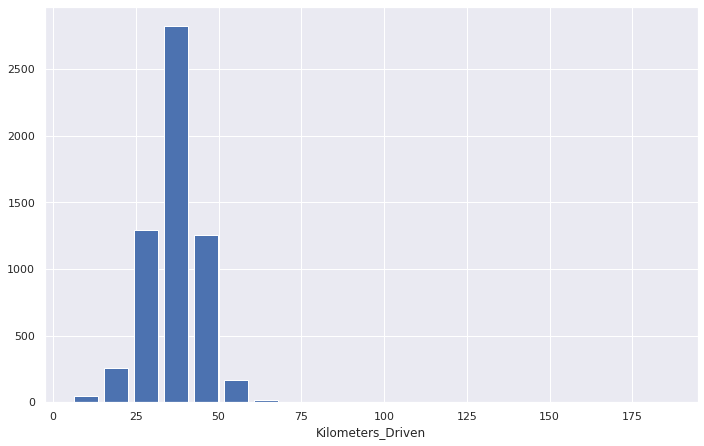

In [2072]:
x = np.cbrt(new_train_data.Kilometers_Driven)
plt.hist(x, bins=20, rwidth=0.8)
plt.xlabel("Kilometers_Driven")
plt.show()

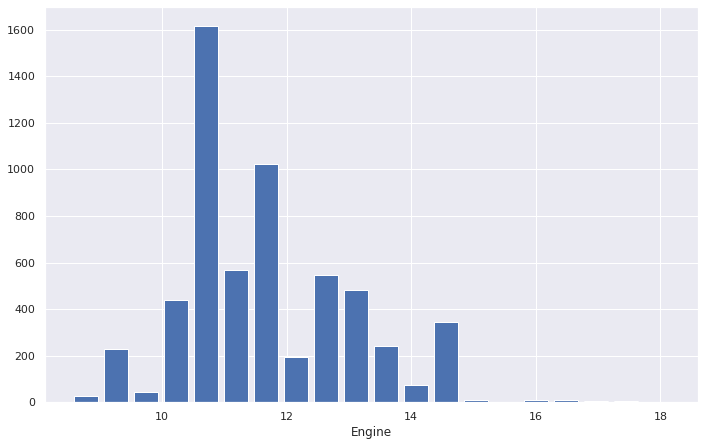

In [2073]:
x = np.cbrt(new_train_data.Engine)
plt.hist(x, bins=20, rwidth=0.8)
plt.xlabel("Engine")
plt.show()

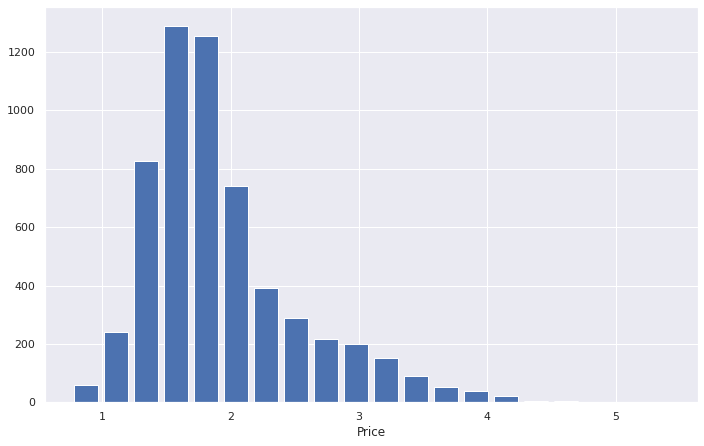

In [2074]:
x = np.cbrt(new_train_data.Price)
plt.hist(x, bins=20, rwidth=0.8)
plt.xlabel("Price")
plt.show()

#Test data distribution after cube root transformation

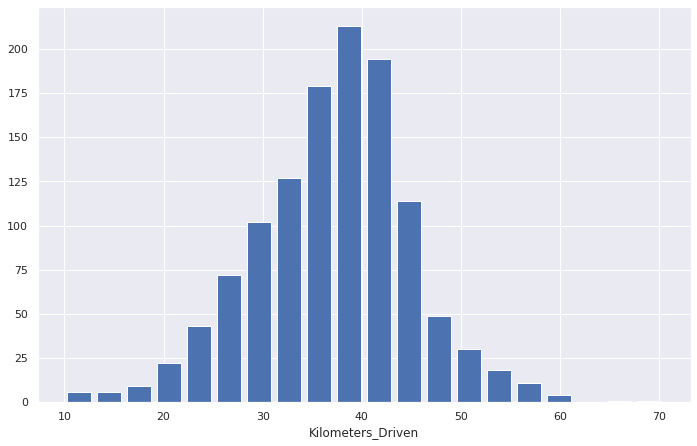

In [2075]:
x = np.cbrt(new_test_data.Kilometers_Driven)
plt.hist(x, bins=20, rwidth=0.8)
plt.xlabel("Kilometers_Driven")
plt.show()

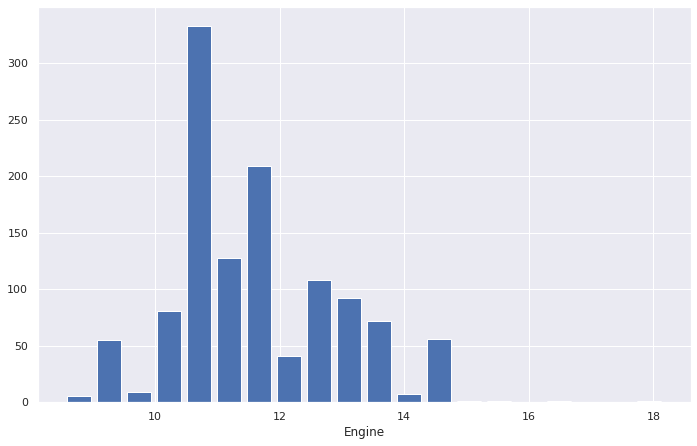

In [2076]:
x = np.cbrt(new_test_data.Engine)
plt.hist(x, bins=20, rwidth=0.8)
plt.xlabel("Engine")
plt.show()

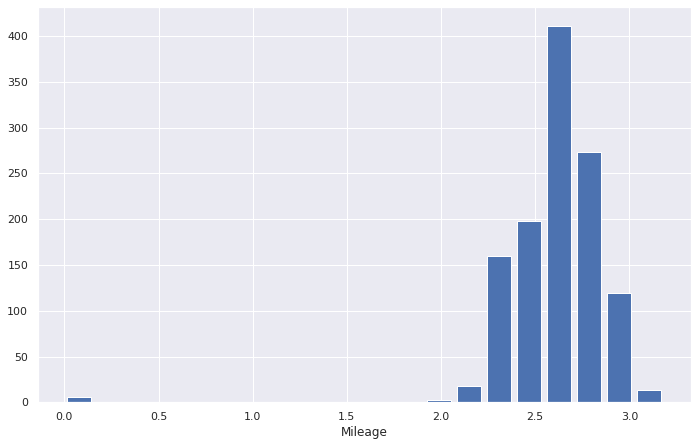

In [2077]:
x = np.cbrt(new_test_data.Mileage)
plt.hist(x, bins=20, rwidth=0.8)
plt.xlabel("Mileage")
plt.show()

#Min Max Scaler

In [2078]:
numeric_col = ['Kilometers_Driven', 'Mileage', 'Engine', 'Price']
numeric_df = new_train_data[numeric_col]

In [2079]:
#Dataframe before scaling
numeric_df.head()

Kilometers_Driven  Mileage  Engine  Price
0              72000    26.60     998   1.75
1              41000    19.67    1582  12.50
2              46000    18.20    1199   4.50
3              87000    20.77    1248   6.00
4              40670    15.20    1968  17.74

In [2080]:
scaler = MinMaxScaler(feature_range=(0,1))
numeric = scaler.fit_transform(numeric_df)
numeric_df1 = pd.DataFrame(data=numeric, columns=numeric_col)
numeric_df1.head()

Kilometers_Driven   Mileage    Engine     Price
0           0.011051  0.793083  0.069594  0.008210
1           0.006282  0.586464  0.178266  0.075583
2           0.007051  0.542636  0.106997  0.025445
3           0.013359  0.619261  0.116115  0.034846
4           0.006231  0.453190  0.250093  0.108423

In [2081]:
scaler = StandardScaler()
numeric = scaler.fit_transform(numeric_df)
numeric_df2 = pd.DataFrame(data=numeric, columns=numeric_col)
numeric_df2.head()

Kilometers_Driven   Mileage    Engine     Price
0           0.148468  1.906442 -1.043476 -0.698219
1          -0.187898  0.318916 -0.072717  0.257464
2          -0.133646 -0.017831 -0.709362 -0.453742
3           0.311225  0.570905 -0.627911 -0.320391
4          -0.191479 -0.705072  0.568916  0.723304

In [2082]:
scaler = RobustScaler()
numeric = scaler.fit_transform(numeric_df)
numeric_df3 = pd.DataFrame(data=numeric, columns=numeric_col)
numeric_df3.head()

Kilometers_Driven   Mileage    Engine     Price
0           0.497457  1.438356 -0.627364 -0.617046
1          -0.297817  0.251712  0.109079  1.041265
2          -0.169547  0.000000 -0.373897 -0.192827
3           0.882267  0.440068 -0.312106  0.038565
4          -0.306283 -0.513699  0.595839  1.849595

In [2083]:
#Dataframe after scaling
transform_df = pd.DataFrame(data=numeric,columns=numeric_col)
transform_df.head()

Kilometers_Driven   Mileage    Engine     Price
0           0.497457  1.438356 -0.627364 -0.617046
1          -0.297817  0.251712  0.109079  1.041265
2          -0.169547  0.000000 -0.373897 -0.192827
3           0.882267  0.440068 -0.312106  0.038565
4          -0.306283 -0.513699  0.595839  1.849595

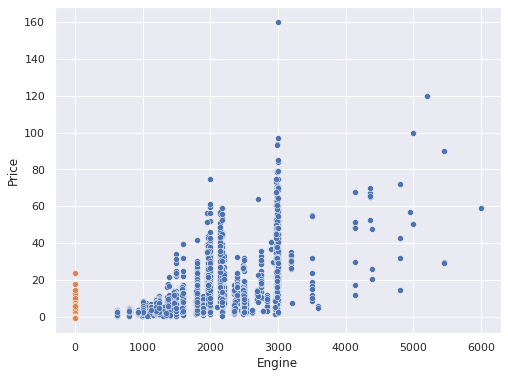

In [2084]:
sns.set(rc={'figure.figsize':(8,6)})
sns.scatterplot(data = new_train_data, x='Engine', y='Price')
sns.scatterplot(data = transform_df, x='Engine', y='Price')
plt.show() 

#Outlier Detection and Removing it Using IQR

In [2085]:
Q1 = new_train_data.Kilometers_Driven.quantile(0.25)
Q3 = new_train_data.Kilometers_Driven.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

38980.25


In [2086]:
#Upperlimit and lowerlimit to find outliers
upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)

In [2087]:
#Drop all the rows containing height beyond lower and upper limit.
new_train_data[(new_train_data.Kilometers_Driven < lowerlimit) | (new_train_data.Kilometers_Driven > upperlimit)].head()

Location  Year  Kilometers_Driven Fuel_Type Transmission      Owner_Type  \
29    Mumbai  2007             262000    Diesel       Manual  Fourth & Above   
64   Chennai  2016             178000    Diesel       Manual           First   
77   Chennai  2006             230000    Petrol       Manual           Third   
154     Pune  2012             136997    Diesel    Automatic           First   
164    Kochi  2014             147898    Diesel       Manual           First   

     Mileage  Engine   Power  Seats  Price Brand_Name  
29      12.8    2494  102.00    7.0   4.00     Toyota  
64      25.0    1396   69.00    5.0   2.50       Tata  
77      12.4    1998  132.00    8.0   4.50     Toyota  
154     17.2    1968  138.10    5.0   8.50      Skoda  
164     22.7    1498   89.84    5.0   4.42       Ford

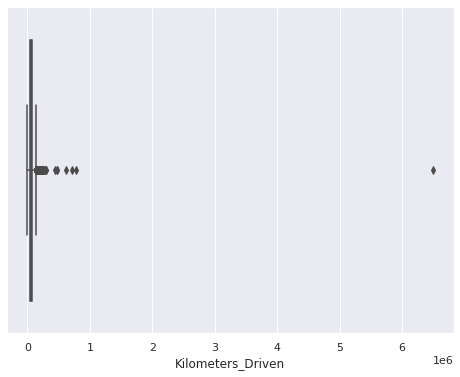

In [2088]:
sns.boxplot(x=new_train_data['Kilometers_Driven'])
plt.show()

In [2089]:
train_out = new_train_data[(new_train_data.Kilometers_Driven > lowerlimit) & (new_train_data.Kilometers_Driven < upperlimit)]
train_out.shape

(5673, 12)

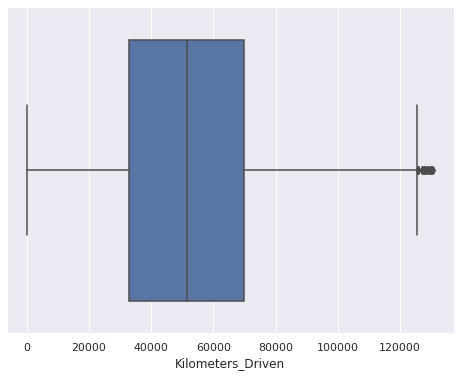

In [2090]:
sns.boxplot(x=train_out['Kilometers_Driven'])
plt.show()

In [2091]:
#Engine
Q1 = new_train_data.Engine.quantile(0.25)
Q3 = new_train_data.Engine.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)

793.0


In [2092]:
new_train_data[(new_train_data.Engine < lowerlimit) | (new_train_data.Engine > upperlimit)].head()

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
70       Mumbai  2008              73000    Petrol    Automatic      First   
152     Kolkata  2010              35277    Petrol    Automatic      First   
459  Coimbatore  2016              51002    Diesel    Automatic      First   
586       Kochi  2014              79926    Diesel    Automatic      First   
589   Bangalore  2006              47088    Petrol    Automatic     Second   

     Mileage  Engine  Power  Seats  Price     Brand_Name  
70      8.50    4806  500.0    5.0  14.50        Porsche  
152     7.81    5461  362.9    5.0  30.00  Mercedes-Benz  
459    11.33    4134  335.2    7.0  48.91           Audi  
586    11.33    4134  335.2    7.0  29.77           Audi  
589    10.13    3498  364.9    5.0  19.00  Mercedes-Benz

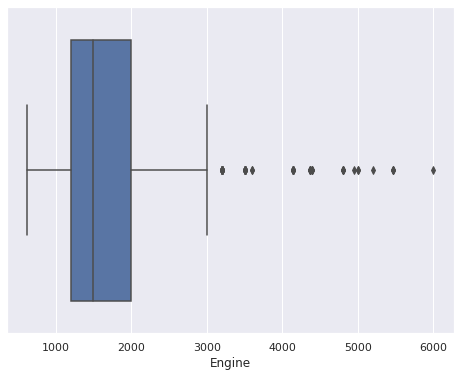

In [2093]:
sns.boxplot(x=new_train_data['Engine'])

In [2094]:
train_out = new_train_data[(new_train_data.Engine > lowerlimit) & (new_train_data.Engine < upperlimit)]
train_out.shape

(5814, 12)

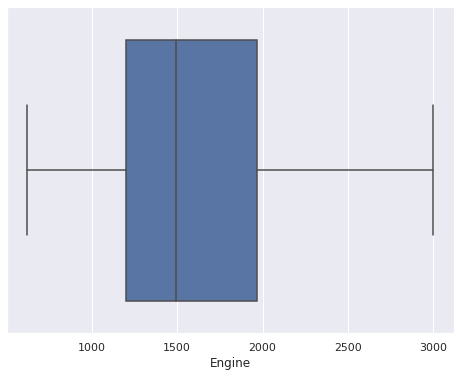

In [2095]:
sns.boxplot(x=train_out['Engine'])
plt.show()

In [2096]:
#Mileage
Q1 = new_train_data.Mileage.quantile(0.25)
Q3 = new_train_data.Mileage.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)

5.840000000000002


In [2097]:
new_train_data[(new_train_data.Mileage < lowerlimit) | (new_train_data.Mileage > upperlimit)].head()

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
14         Pune  2012              85000    Diesel    Automatic     Second   
67   Coimbatore  2019              15369    Diesel    Automatic      First   
544       Kochi  2019              13190    Petrol    Automatic      First   
707        Pune  2014             120000    Diesel    Automatic      First   
962      Mumbai  2018               8682    Diesel    Automatic      First   

     Mileage  Engine   Power  Seats  Price     Brand_Name  
14       0.0    2179  115.00    5.0  17.50           Land  
67       0.0    1950  194.00    5.0  35.67  Mercedes-Benz  
544      0.0    1950  181.43    5.0  38.99  Mercedes-Benz  
707      0.0    2987  165.00    5.0  30.00  Mercedes-Benz  
962      0.0    1950  194.00    5.0  39.50  Mercedes-Benz

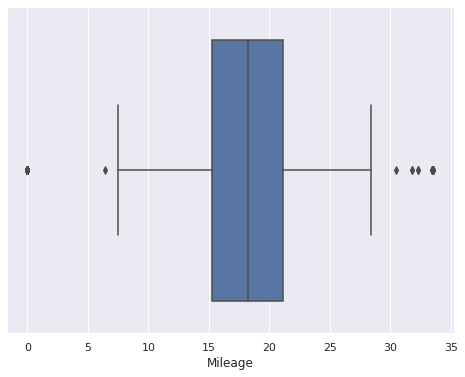

In [2098]:
sns.boxplot(x=new_train_data['Mileage'])

In [2099]:
train_out = new_train_data[(new_train_data.Mileage > lowerlimit) & (new_train_data.Mileage < upperlimit)]
train_out.shape

(5829, 12)

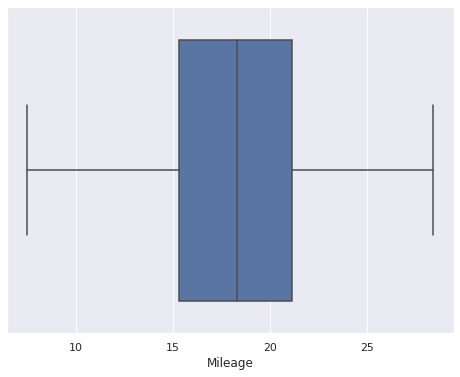

In [2100]:
sns.boxplot(x=train_out['Mileage'])

In [2101]:
#Price
Q1 = new_train_data.Price.quantile(0.25)
Q3 = new_train_data.Price.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)


6.4825


In [2102]:
new_train_data[(new_train_data.Price < lowerlimit) | (new_train_data.Price > upperlimit)].head()

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
13      Delhi  2014              72000    Diesel    Automatic      First   
19  Bangalore  2014              78500    Diesel    Automatic      First   
22     Mumbai  2015              55985    Petrol    Automatic      First   
38       Pune  2013              85000    Diesel    Automatic      First   
50      Kochi  2015              13648    Diesel    Automatic      First   

    Mileage  Engine   Power  Seats  Price     Brand_Name  
13    12.70    2179  187.70    5.0  27.00           Land  
19    14.84    2143  167.62    5.0  28.00  Mercedes-Benz  
22    13.53    1984  177.01    5.0  23.50           Audi  
38    11.74    2987  254.80    5.0  28.00  Mercedes-Benz  
50    17.11    1968  174.33    5.0  21.43           Audi

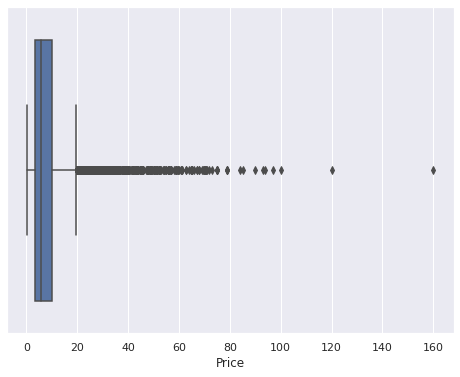

In [2103]:
sns.boxplot(x=new_train_data['Price'])

In [2104]:
train_out = new_train_data[(new_train_data.Price > lowerlimit) & (new_train_data.Price < upperlimit)]
train_out.shape

(5160, 12)

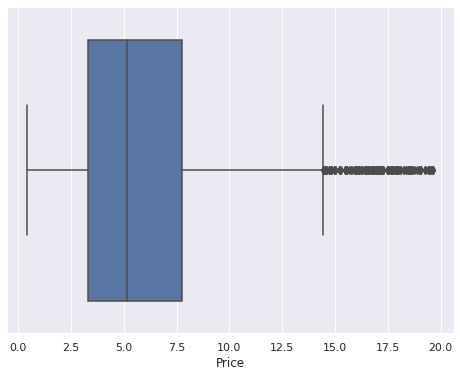

In [2105]:
sns.boxplot(x=train_out['Price'])
plt.show()

# 5. Training Model

In [2106]:
model_1 = LinearRegression()
model_2 = LinearRegression()
model_3 = LinearRegression()


In [2107]:
model_1.fit(np.array(numeric_df1[['Kilometers_Driven','Mileage','Engine']]).reshape(-1,3),new_train_data.Price)
model_1

LinearRegression()

In [2108]:
model_1.coef_

array([-55.45180053,  11.29269121,  75.14252296])

In [2109]:
model_1.intercept_

-10.06106024445397

In [2110]:
model_2.fit(np.array(numeric_df2[['Kilometers_Driven','Mileage','Engine']]).reshape(-1,3),new_train_data.Price)
model_2

LinearRegression()

In [2111]:
model_2.coef_

array([-0.78625523,  1.46976189,  8.41180346])

In [2112]:
model_2.intercept_

9.603918596730246

In [2113]:
model_3.fit(np.array(numeric_df3[['Kilometers_Driven','Mileage','Engine']]).reshape(-1,3),new_train_data.Price)
model_3

LinearRegression()

In [2114]:
model_3.coef_

array([-0.33255106,  1.96628851, 11.08820631])

In [2115]:
model_3.intercept_

7.805234773799251

# 6. Prediction

In [2116]:
x = np.array([-55.45180053,  11.29269121,  75.14252296]).reshape(-1,3)
model_1.predict(x)

array([8838.76475296])

In [2117]:
x = np.array([-0.78625523,  1.46976189,  8.41180346]).reshape(-1,3)
model_2.predict(x)

array([83.1407533])

In [2118]:
x = np.array([-0.33255106,  1.96628851, 11.08820631]).reshape(-1,3)
model_3.predict(x)

array([134.73043465])

# 7. Evaluating your Model

# SUBMISSION DATE: 2nd April 2022